## Remove dodgy images

In [6]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt

In [3]:
data_dir = 'data'

In [4]:
image_ext = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')


Image not in ext list data\happy\depositphotos_12767124-stock-photo-joyful-man-face.jpg
Image not in ext list data\happy\depositphotos_32817757-Smiling-man.jpg
Image not in ext list data\happy\depositphotos_374111884-stock-photo-cute-happy-face-close-face.jpg
Image not in ext list data\sad\4acd8a7b1939404ab4c8adc5ac7472fc.webp
Image not in ext list data\sad\64bd10d4-b3c7.webp
Image not in ext list data\sad\64bd1208-fc1.webp
Image not in ext list data\sad\64bd14ec-8bd2.webp
Image not in ext list data\sad\black-business-man-city-park-footage-076367893_iconl.jpeg
Image not in ext list data\sad\sad-man-in-the-shadows.jpg


## Load Data

In [10]:
import numpy as np

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 205 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000002115533F770>)

In [22]:
# Get another bacth from the iterator
batch = data_iterator.next()
batch

(array([[[[254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ],
          ...,
          [254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ]],
 
         [[254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ],
          ...,
          [254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ]],
 
         [[254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ],
          ...,
          [254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ]],
 
         ...,
 
         [[254.      , 254.      , 254.      ],
          [254.   

In [16]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

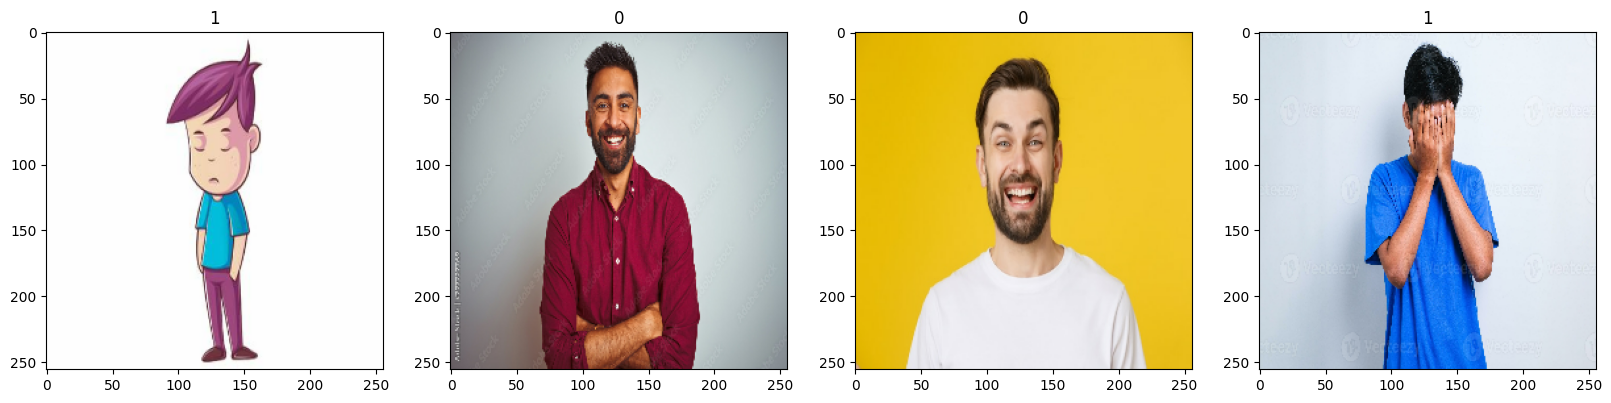

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocess Data

## Scale Data

In [24]:
data = data.map(lambda x,y: (x/255, y))

## Split Data

In [36]:
len(data)

7

In [33]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

## Build Deep Learning Model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input

In [45]:
model = Sequential()

In [46]:
model.add(Input(shape=(256, 256, 3)))

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [49]:
logdir = 'logs'

In [50]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [58]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 746ms/step - accuracy: 0.9969 - loss: 0.0185 - val_accuracy: 0.9844 - val_loss: 0.0484
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 763ms/step - accuracy: 0.9854 - loss: 0.0503 - val_accuracy: 1.0000 - val_loss: 0.0286
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 638ms/step - accuracy: 0.9948 - loss: 0.0343 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 625ms/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 632ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.9844 - val_loss: 0.0348
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 623ms/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 594ms/step - accuracy: 0.9885 - loss: 0.0231 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 736ms/step - accuracy: 0.9865 - loss: 0.0197 - val_accuracy: 1.0000 - val_loss: 0.0030
Epo

## Plot Performance

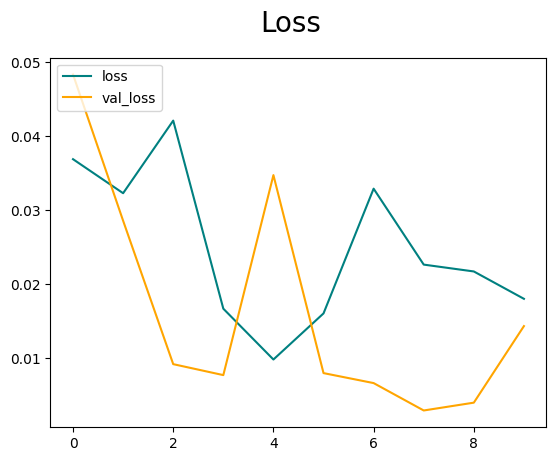

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

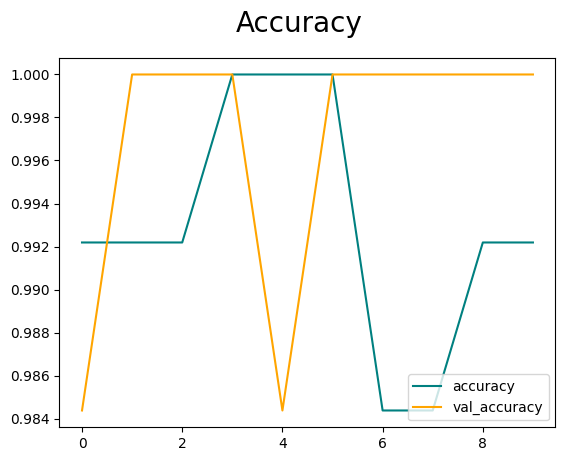

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='lower right')
plt.show()

# Evaluate Performance

## Evaluate

In [61]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [62]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [63]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


In [65]:
print(f'Precision:{pre.result()}, Recall:{re.result()}, Accuracy:{acc.result()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## Test

### Happy Test

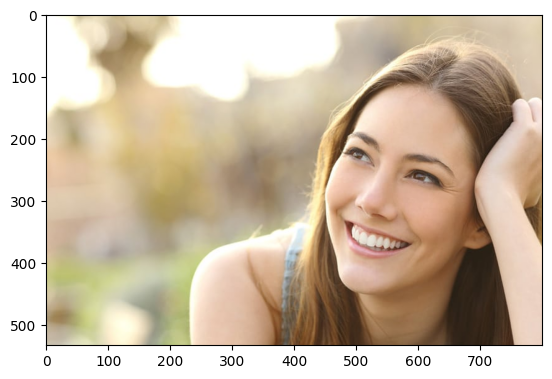

In [67]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

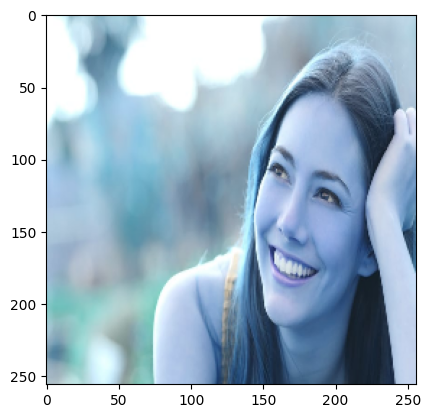

In [70]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [74]:
image_test = np.expand_dims(resize/255,0)

yhat = model.predict(image_test)

if yhat > 0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted class is Happy


### Sad Test

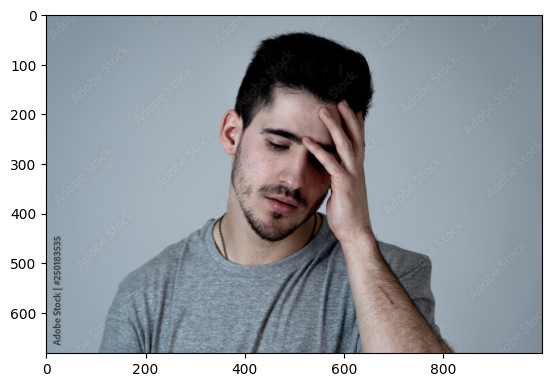

In [76]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

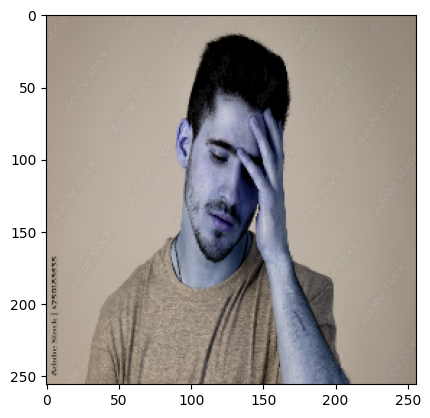

In [77]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [78]:
image_test = np.expand_dims(resize/255,0)

yhat = model.predict(image_test)

if yhat > 0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted class is Sad


# Save the model

In [79]:
model.save(os.path.join('happysadmodel.h5'))